In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import bbi

## Set plotting parameters

In [2]:
mpl.rcParams.update({'pdf.fonttype': 42,
                     'ps.fonttype': 42,
                     'xtick.labelsize': 22,
                     'ytick.labelsize': 22,
                     'axes.labelsize':22,
                     'font.size': 22})

## Define functions

In [4]:
# calculates stacks for plotting 

def calculate_stacks(regions, chip_path, center, nbins):
    df = regions.copy()
    chroms = df.chrom
    starts = df.mid - window
    ends = df.mid + window
    stack = bbi.stackup(chip_path, chroms, starts, ends, bins=nbins) 
    stack[np.isnan(stack)] = 0
    # Flip CTCF mapping to the minus strand
    mask = df.strand == '-'
    stack[mask] = np.flip(stack[mask], axis = 1)
    return stack

## Upload ChIP-seq data

In [13]:
# Path to ChIP-seq files

chipMap = {"ProteinX": "/groups/gerlich/experiments/Experiments_005600/005609/normalization/deeptools_out/ProteinX_norm_log2.bw",
            "ProteinY": "/groups/gerlich/experiments/Experiments_005600/005609/normalization/deeptools_out/ProteinY_norm_log2.bw"}

## Upload CTCF peaks

In [14]:
center = 'CTCF'
path = '/groups/gerlich/experiments/Experiments_005000/005019/data/ctcf_peaks_at_motifs.bed'

ctcf = pd.read_csv(path, sep = '\t',header = None , index_col = False)[[0,1,2,3]]
ctcf.columns = ["chrom", "start", "end", "strand"]
ctcf.loc [:, "mid"] = ((ctcf["end"] + ctcf["start"])/2).astype(int)
ctcf

,chrom,start,end,strand,mid
0,chr1,10021,10611,-,10316
1,chr1,91071,91614,+,91342
2,chr1,237590,237915,+,237752
3,chr1,521320,521733,+,521526
4,chr1,713890,714637,-,714263
...,...,...,...,...,...
53912,chrY,10021990,10024708,-,10023349
53913,chrY,13311559,13312341,-,13311950
53914,chrY,13402717,13403663,+,13403190
53915,chrY,13636603,13636905,-,13636754


## Calculate stacks for CTCF peaks

In [15]:
window = 10000
nbins = 100

In [16]:
stacks = {}
   
for chip_name, chip_path in chipMap.items():
        s = calculate_stacks (ctcf, chip_path, center, nbins)
        stacks [chip_name] = s

## Plot stacks

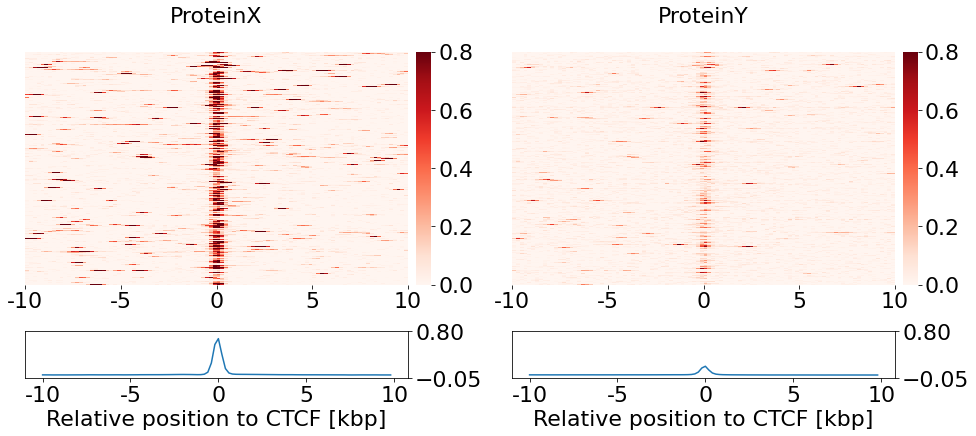

In [28]:
f, axs = plt.subplots(
    figsize=(16, 6),
    nrows=1, 
    ncols=2)

ax = axs[0]
ax.set_title('ProteinX\n', fontsize = 22)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad='2%')
im = sns.heatmap(stacks["ProteinX"], ax=ax, cmap = 'Reds', vmin=0.0, vmax=0.8, yticklabels=False, cbar_ax=cax)
ax.set_xticks(np.linspace(0, nbins, num = 5))
ax.set_xticklabels((np.linspace(-window/1000, window/1000, num = 5, dtype = int)), rotation = 0)  
cax2 = divider.append_axes("bottom", size="20%", pad='20%')
cax2.plot(stacks["ProteinX"].mean(axis=0))
cax2.set_xticks(np.linspace(0, nbins, num = 5))
cax2.set_xticklabels((np.linspace(-window/1000, window/1000, num = 5, dtype = int)), rotation = 0)  
cax2.yaxis.tick_right()
cax2.yaxis.set_label_position("right")
cax2.set_ylim(-0.05, 0.8)
cax2.set_yticks (np.array([-0.05, 0.8]))
cax2.set_xlabel (f"Relative position to {center} [kbp]")

ax = axs[1]
ax.set_title('ProteinY\n', fontsize = 22)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad='2%')
im = sns.heatmap(stacks["ProteinY"], ax=ax, cmap = 'Reds', vmin=0.0, vmax=0.8, yticklabels=False, cbar_ax=cax)
ax.set_xticks(np.linspace(0, nbins, num = 5))
ax.set_xticklabels((np.linspace(-window/1000, window/1000, num = 5, dtype = int)), rotation = 0)  
cax2 = divider.append_axes("bottom", size="20%", pad='20%')
cax2.plot(stacks["ProteinY"].mean(axis=0))
cax2.set_xticks(np.linspace(0, nbins, num = 5))
cax2.set_xticklabels((np.linspace(-window/1000, window/1000, num = 5, dtype = int)), rotation = 0)  
cax2.yaxis.tick_right()
cax2.yaxis.set_label_position("right")
cax2.set_ylim(-0.05, 0.8)
cax2.set_yticks (np.array([-0.05, 0.8]))
cax2.set_xlabel (f"Relative position to {center} [kbp]")

plt.show()